In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sn
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity
import math

In [40]:
headers = list(pd.read_csv("day-headers.csv") )
data = pd.read_csv("day.csv", names=headers, index_col=False, skiprows = [0], delimiter=",") 
# Preview the first 5 lines of the loaded data 
data = data.drop('instant', axis=1)
data = data.drop('dteday', axis=1)
data = data.drop('registered', axis=1)
data = data.drop('casual', axis=1)
Y = 'cnt'
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [41]:
original_data = data.copy()

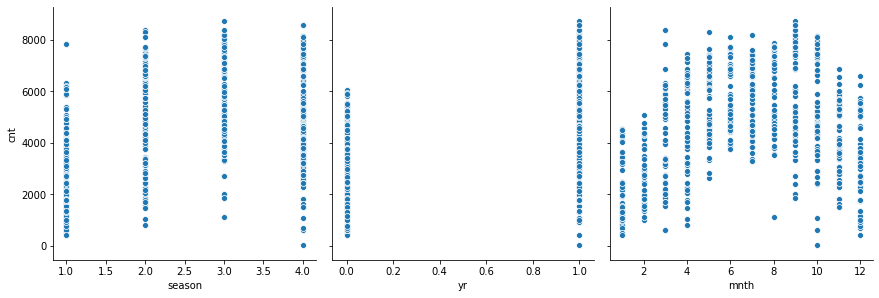

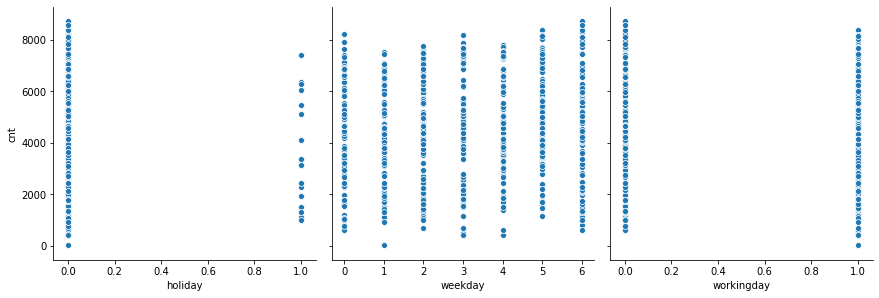

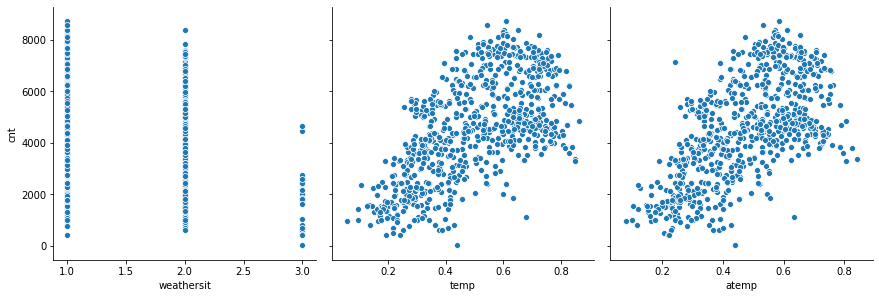

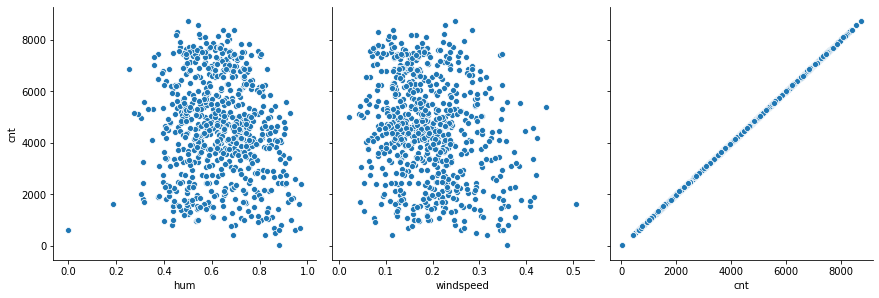

In [43]:
sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[:3],height = 4)
sns.savefig("output1.png")

sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[3:6],height = 4)
sns.savefig("output2.png")

sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[6:9],height = 4)
sns.savefig("output3.png")

sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[9:12],height = 4)
sns.savefig("output4.png")
#sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[12:13],height = 4)
#sns.savefig("output5.png")

#ax = sn.regplot(x="registered", y=Y, data=data)
#ax.figure.savefig("registered_output.png")

#ax = sn.regplot(x="casual", y=Y, data=data)
#ax.figure.savefig("casual_output.png")

#ax = sn.regplot(x="workingday", y=Y, data=data)
#ax.figure.savefig("workingday_output.png")

In [44]:
def norm_vector(vector):
    return LA.norm(vector)

def normalize_vector(vector):
    return np.array(vector) * (1/norm_vector(vector))

for column in data:
   # Select column contents by column name using [] operator
   columnSeriesObj = normalize_vector(data[column])
   #print('Colunm Name : ', column)
   #print('Column Contents : ', columnSeriesObj)
   data[column] = columnSeriesObj

In [45]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0.013537,0.0,0.005014,0.0,0.061555,0.000000,0.049386,0.024105,0.026816,0.046293,0.028860,0.007431
1,0.013537,0.0,0.005014,0.0,0.000000,0.000000,0.049386,0.025458,0.026087,0.039989,0.044705,0.006043
2,0.013537,0.0,0.005014,0.0,0.010259,0.044721,0.024693,0.013753,0.013968,0.025120,0.044663,0.010177
3,0.013537,0.0,0.005014,0.0,0.020518,0.044721,0.024693,0.014008,0.015643,0.033919,0.028833,0.011784
4,0.013537,0.0,0.005014,0.0,0.030778,0.044721,0.024693,0.015896,0.016908,0.025102,0.033618,0.012070


In [46]:
def cosine_squared(u, v):
    uTv = np.matmul(np.transpose(u),v)
    uTu = np.matmul(np.transpose(u),u)
    vTv = np.matmul(np.transpose(v),v)
    return pow(uTv, 2)/(uTu * vTv)

In [47]:
def max_cosine(data, out_columns, Y):
    best = -10000
    #print(out_columns)
    for column in data:
        if column not in out_columns:
            j = cosine_squared(data[column], data[Y])
            if (j > best):
                best = j
                max_cos = column
    
    return (max_cos, best)

In [48]:
def projection_orthogonal(vector, base):
    return np.subtract(vector, projection(vector, base))

def projection(vector, base):
    #print(vector)
    
    proj = np.zeros(len(vector))
    for w in base:
        x = np.inner(data[w], vector)
        proj = np.add(proj, x * data[w])
    
    return proj


In [49]:
out_columns = [Y]
ordered_features = []
for k in range(len(data.columns) - 1):
    max_similarity, value = max_cosine(data,out_columns, Y)
    out_columns.append(max_similarity)
    ordered_features.append(max_similarity)
    print("k {} : {}".format(k, max_similarity))
    
    for col in data:
        if col not in out_columns or col == Y:
            print("reprojetando {}".format(col))
            p = projection_orthogonal(data[col], data[ordered_features])
            data[col] = p
    
    
ordered_features

k 0 : atemp
reprojetando season
reprojetando yr
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando weathersit
reprojetando temp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 1 : yr
reprojetando season
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando weathersit
reprojetando temp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 2 : season
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando weathersit
reprojetando temp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 3 : weathersit
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando temp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 4 : mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando temp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 5 : weekday
reprojetando holida

['atemp',
 'yr',
 'season',
 'weathersit',
 'mnth',
 'weekday',
 'windspeed',
 'workingday',
 'holiday',
 'hum',
 'temp']

In [50]:
def rmse(targets, predictions):
    m = ((predictions - targets) ** 2).mean()
    #print("{} - sqrt: {}".format(m, np.sqrt(m)))
    return np.sqrt(m)

def select_bests_params(results):
    df_results = pd.DataFrame(results)
    return df_results.sort_values([1],  ascending=True)

# least squares via QR decomposition
from numpy.linalg import inv
from numpy.linalg import qr

def qr_coef(X, y):
    # QR decomposition
    Q, R = qr(X)
    b = inv(R).dot(Q.T).dot(y)
    return b


In [51]:
original_data.loc[:, original_data.columns != Y]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


In [62]:
results = []
X_train, X_test, y_train, y_test = train_test_split(original_data.loc[:, original_data.columns != Y],  original_data[Y].values, test_size=0.3, random_state=42)

for i in range(len(ordered_features)):
    X_train_selected =  X_train[ordered_features[:i+1]].values
    X_test_selected = X_test[ordered_features[:i+1]].values
    #QR decoposition
    
    coefs = qr_coef(X_train_selected, y_train)
    #print(coefs)
    y_pred = X_test_selected.dot(coefs)
    
    # The mean squared error
    #print(y_test, y_pred)
    rmse_result = rmse(y_test, y_pred)
    #print(rmse_result)
    results.append([i, rmse_result])

ranking = select_bests_params(results)
graph_result = pd.DataFrame(results)
print(ranking)


     0            1
8    8   884.181969
9    9   884.344464
7    7   888.116372
6    6   894.825124
5    5   899.303339
3    3   925.324375
4    4   927.609976
10  10   931.809030
2    2  1012.047104
1    1  1087.223371
0    0  1616.771308


In [53]:
teste_Y = np.array([6606, 1550, 3747])
predito_T = np.array([7449.97460345, 1832.04164897, 4049.19346325])

x = ((predito_T - teste_Y) ** 2).mean()
print(x)
print(np.sqrt(x))
#print("{} - sqrt: {}".format(m, np.sqrt(m)))
#return np.sqrt(m)


294387.1707511104
542.5745762115199


In [65]:

fig, ax = plt.subplots(figsize=(10,10))
#ax.plot([x+1 for x in graph_result[0]], graph_result[1])
types = [math.floor(x) for x in graph_result[1]]
ax.set_xlabel('Num. features', fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
plt.xticks(range(1,12))

for i, txt in enumerate(types):
    ax.annotate(txt, (graph_result[0][i], graph_result[1][i]), xytext=(1,1), textcoords='offset points')
    plt.plot([ x+1 for x in graph_result[0]], graph_result[1], marker='x', color='blue')
plt.savefig("data.png")
plt.clf()

<Figure size 720x720 with 0 Axes>

In [60]:
original_data[original_data.columns[11]]

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64